## **Data-Driven Real Estate: Classifying properties based on investment potential**

   
**Data sources**:
 
- *Zillow, Datarade, Realtor, National Association of Realtors (NAR), U.S. Census Bureau.*

**Summary**:


- **Objective**: *The primary goal of this project is to create a Machine Learning Classifier that categorizes properties based on the Return On Investment (ROI), dividing them into three categories:*  

    - *'No investment potential (NIP)',*
    - *'Moderate investment potential (MIP)',*
    - *'High investment potencial (HIP)'.*

***ROI**: Return on investment, or ROI, is a mathematical formula that investors can use to evaluate their investments and judge how well a particular investment has performed compared to others.*

- **Exploratory Data Analysis (EDA)**:
    
    - *Collect and clean data on properties, including price, location, size and amenities, from sources like Zillow and Realtor.*

    - *Analyze the distribution of property values and investment trends by region and others variables.*

    - *Explore correlations between property features and ROI to identify the key determinants of investment potential.*

    - *Visualize trends and patterns in property investment returns across different geographical areas.*

- **Machine Learning approach**:

    - **Model development**: *Use classification algorithms (e.g., decision trees, random forests, logistic regression) to build the investment potential classifier.*

    - **Feature engineering**: *Create new variables that capture important aspects of property investment. These features are designed to enhance the model's ability to predict ROI by better representing the factors that influence property value.*

    - **Model evaluation**: *Assess model performance using metrics such as accuracy, precision, recall and F1 score to ensure reliable predictions.*

- **Potential impact**:
    - *This project aims to assist investors in identifying lucrative properties by providing data-driven insights into the investment potential of various real estate assets.*

    - *The classifier can help real estate professionals make informed decisions on property investments, ultimately improving portfolio performance.*

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import display_functions as dpf

import plotly.express as px
import folium
import json
import requests
import folium
from folium.plugins import MarkerCluster

from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr

import importlib
importlib.reload(dpf)

import warnings
warnings.filterwarnings('ignore');

### 1. Load and visualisation of the dataset

In [95]:
# Loads the DataFrame we are going to work with.
housing_us = pd.read_csv("../data/real_estate_us.csv")

In [96]:
housing_us.head(10)

,property_id,state,city,price,area_sqft,bedrooms,bathrooms,lot_size_acres,year_built,rental_income,mainroad_access,airconditioning,garage_parking,school_rating,walkability_score,preferred_area,tax_rate,maintenance_cost
0,1,California,San Diego,2638547.0,667.0,NaN,3.0,0.43,1955,12880.0,Yes,No,2.0,2.0,31.0,No,2.49,5711.0
1,2,Nevada,Henderson,1093731.0,965.0,4.0,4.0,3.24,1973,3857.0,Yes,Yes,0.0,6.0,10.0,Yes,2.58,6194.0
2,3,Texas,Dallas,849545.0,3218.0,5.0,2.0,4.59,1989,2901.0,No,No,1.0,3.0,79.0,Yes,0.55,6045.0
3,4,California,San Diego,1362633.0,2298.0,NaN,4.0,3.83,2001,3589.0,Yes,No,0.0,NaN,28.0,Yes,1.63,1001.0
4,5,Texas,Houston,950855.0,2612.0,4.0,2.0,2.93,2006,2342.0,Yes,No,3.0,3.0,20.0,No,0.67,2954.0
5,6,Arizona,Tucson,920073.0,2470.0,2.0,2.0,1.47,2018,4146.0,No,No,NaN,3.0,38.0,Yes,0.70,5610.0
6,7,California,San Diego,1380429.0,4368.0,2.0,1.0,2.04,1995,3572.0,No,Yes,1.0,2.0,32.0,No,0.76,4594.0
7,8,Arizona,Scottsdale,NaN,4592.0,5.0,3.0,0.19,2005,10045.0,No,No,0.0,2.0,6.0,Yes,2.00,3312.0
8,9,Georgia,Atlanta,1491201.0,3091.0,4.0,3.0,3.59,1998,6160.0,Yes,No,3.0,1.0,17.0,Yes,0.68,5579.0
9,10,Illinois,Chicago,702736.0,4761.0,NaN,4.0,1.17,2004,NaN,No,No,3.0,5.0,36.0,Yes,0.85,3418.0


In [97]:
housing_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15108 entries, 0 to 15107
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   property_id        15108 non-null  int64  
 1   state              15108 non-null  object 
 2   city               15108 non-null  object 
 3   price              14051 non-null  float64
 4   area_sqft          14051 non-null  float64
 5   bedrooms           14051 non-null  float64
 6   bathrooms          14051 non-null  float64
 7   lot_size_acres     15108 non-null  float64
 8   year_built         15108 non-null  int64  
 9   rental_income      14051 non-null  float64
 10  mainroad_access    15108 non-null  object 
 11  airconditioning    15108 non-null  object 
 12  garage_parking     14051 non-null  float64
 13  school_rating      14051 non-null  float64
 14  walkability_score  14051 non-null  float64
 15  preferred_area     15108 non-null  object 
 16  tax_rate           140

In [98]:
housing_us.describe()

,property_id,price,area_sqft,bedrooms,bathrooms,lot_size_acres,year_built,rental_income,garage_parking,school_rating,walkability_score,tax_rate,maintenance_cost
count,15108.000000,1.405100e+04,14051.000000,14051.000000,14051.000000,15108.000000,15108.000000,14051.000000,14051.000000,14051.000000,14051.000000,14051.000000,14051.000000
mean,7554.500000,1.035512e+06,2803.738026,2.982635,2.511850,2.535978,1985.978621,3619.710910,1.498043,5.541670,50.370863,1.747003,4010.945627
std,4361.448269,9.033192e+05,1267.764739,1.409620,1.117342,1.411356,20.954755,3363.408439,1.119758,2.872478,28.822031,0.723091,1727.845419
min,1.000000,2.005950e+05,600.000000,1.000000,1.000000,0.100000,1950.000000,424.000000,0.000000,1.000000,1.000000,0.500000,1000.000000
25%,3777.750000,4.989985e+05,1705.000000,2.000000,2.000000,1.310000,1968.000000,1646.000000,0.000000,3.000000,26.000000,1.120000,2535.500000
50%,7554.500000,7.352630e+05,2803.000000,3.000000,3.000000,2.540000,1986.000000,2541.000000,2.000000,6.000000,50.000000,1.740000,4020.000000
75%,11331.250000,1.166840e+06,3908.000000,4.000000,4.000000,3.750000,2004.000000,4176.500000,2.000000,8.000000,75.000000,2.380000,5494.000000
max,15108.000000,5.939204e+06,4999.000000,5.000000,4.000000,5.000000,2022.000000,28518.000000,3.000000,10.000000,100.000000,3.000000,6999.000000


#### 1.1. Description of what each column of the dataset represents

|COLUMN|MEANING|DATA TYPE|NOTE|EXAMPLE|
|---|---|---|---|---|
|**property_id**|*Unique identifier for each property*|*Integer*|*Used only as a reference; irrelevant for modeling*||
|**state**|*The state within the United States where the property is located*|*Categorical*||*California, Texas*|
|**city**|*The specific city within the state where the property is located*|*Categorical*||*Los Angeles, Austin*|
|**price**|*Sale price of the property*|*Continuous numeric*|**Unit**: *US Dollars (USD)*|*$400,000, $1,200,000*|
|**area_sqft**|*The livable area of the property in square feet*|*Continuous numeric*|**Unit**: *Square feet (sqft)*|*2,000 sqft, 3,500 sqft*|
|**bedrooms**|*Total number of bedrooms in the property*|*Discrete numeric*||*2, 4*|
|**bathrooms**|*Total number of bathrooms in the property*|*Discrete numeric*|*Full bathrooms (including shower) count as 1, toilets without shower count 0.5*|*1, 2.5*|
|**lot_size_acres**|*The size of the lot, in acres, on which the property is built*|*Continuous numeric*|**Unit**: *Acres. 1 acre = 43560 sqft*|*0.25, 1.5*|
|**year_built**|*The year the property was constructed*|*Integer*||*1995, 2010*|
|**rental_income**|*Estimated monthly rental income from the property*|*Continuous numeric*|**Unit**: *US Dollars (USD)*|*$1,500, $3,200*|
|**mainroad_access**|*Indicates whether the property has direct access to a main road*|*Binary categorical*||*Yes, No*|
|**airconditioning**|*Indicates whether the property is equipped with an air conditioning system*|*Binary categorical*||*Yes, No*|
|**garage_parking**|*Number of parking spaces available in the garage*|*Discrete numeric*||*0, 2*|
|**school_rating**|*Average rating of nearby schools*|*Discrete numeric*|*From 1 (worst) to 10 (best)*|*5, 9*|
|**walkability_score**|*Walkability score, indicating how close essential services are*|*Discrete numeric*|*From 1 (low accessibility) to 100 (high accessibility)*|*70, 85*|
|**preferred_area**|*Indicates whether the property is located in a preferred or high-demand area*|*Binary categorical*||*Yes, No*|
|**tax_rate**|*Property tax rate*|*Continuous numeric*|**Unit**: *Percentage (%)*|*1.2%, 2.5%*|
|**maintenance_cost**|*Estimated annual maintenance cost of the property*|*Continuous numeric*|**Unit**: *US Dollars (USD)*|*$2,000, $5,000*|

In [99]:
# Remove 'property_id' column
housing_us.drop('property_id', axis = 1, inplace = True)

housing_us.head(5)

,state,city,price,area_sqft,bedrooms,bathrooms,lot_size_acres,year_built,rental_income,mainroad_access,airconditioning,garage_parking,school_rating,walkability_score,preferred_area,tax_rate,maintenance_cost
0,California,San Diego,2638547.0,667.0,NaN,3.0,0.43,1955,12880.0,Yes,No,2.0,2.0,31.0,No,2.49,5711.0
1,Nevada,Henderson,1093731.0,965.0,4.0,4.0,3.24,1973,3857.0,Yes,Yes,0.0,6.0,10.0,Yes,2.58,6194.0
2,Texas,Dallas,849545.0,3218.0,5.0,2.0,4.59,1989,2901.0,No,No,1.0,3.0,79.0,Yes,0.55,6045.0
3,California,San Diego,1362633.0,2298.0,NaN,4.0,3.83,2001,3589.0,Yes,No,0.0,NaN,28.0,Yes,1.63,1001.0
4,Texas,Houston,950855.0,2612.0,4.0,2.0,2.93,2006,2342.0,Yes,No,3.0,3.0,20.0,No,0.67,2954.0


### 2. Train - Test split

*Before proceeding we should split our data in two parts: Train and Test.*

In [100]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_us, test_size = 0.2, random_state = 42)

### 3. Exploratory Data Analysis (EDA)

*This process will be performed only on the training set in order not to 'contaminate' the test data and to treat that set as purely as possible.*

#### 3.1. Univariate analysis

In [101]:
df_typification = pd.DataFrame([train_set.nunique(), train_set.nunique()/len(train_set) * 100, train_set.dtypes]).T.rename(columns = {0: "Card", 1: "%_Card", 2: "Type"})
df_typification

,Card,%_Card,Type
state,8,0.066192,object
city,32,0.264769,object
price,11205,92.710574,float64
area_sqft,4060,33.592586,float64
bedrooms,5,0.04137,float64
bathrooms,4,0.033096,float64
lot_size_acres,491,4.062552,float64
year_built,73,0.604005,int64
rental_income,5435,44.969386,float64
mainroad_access,2,0.016548,object


In [102]:
cat_cols = [
    'state',
    'city',
    'mainroad_access',
    'airconditioning',
    'preferred_area'
]

num_cols = [
    'price',
    'area_sqft',
    'bedrooms',
    'bathrooms',
    'lot_size_acres',
    'year_built',
    'rental_income',
    'garage_parking',
    'school_rating',
    'walkability_score',
    'tax_rate',
    'maintenance_cost'
]

train_set[cat_cols].mode().T # Get the most common type of property.

,0
state,Nevada
city,Scottsdale
mainroad_access,No
airconditioning,Yes
preferred_area,Yes


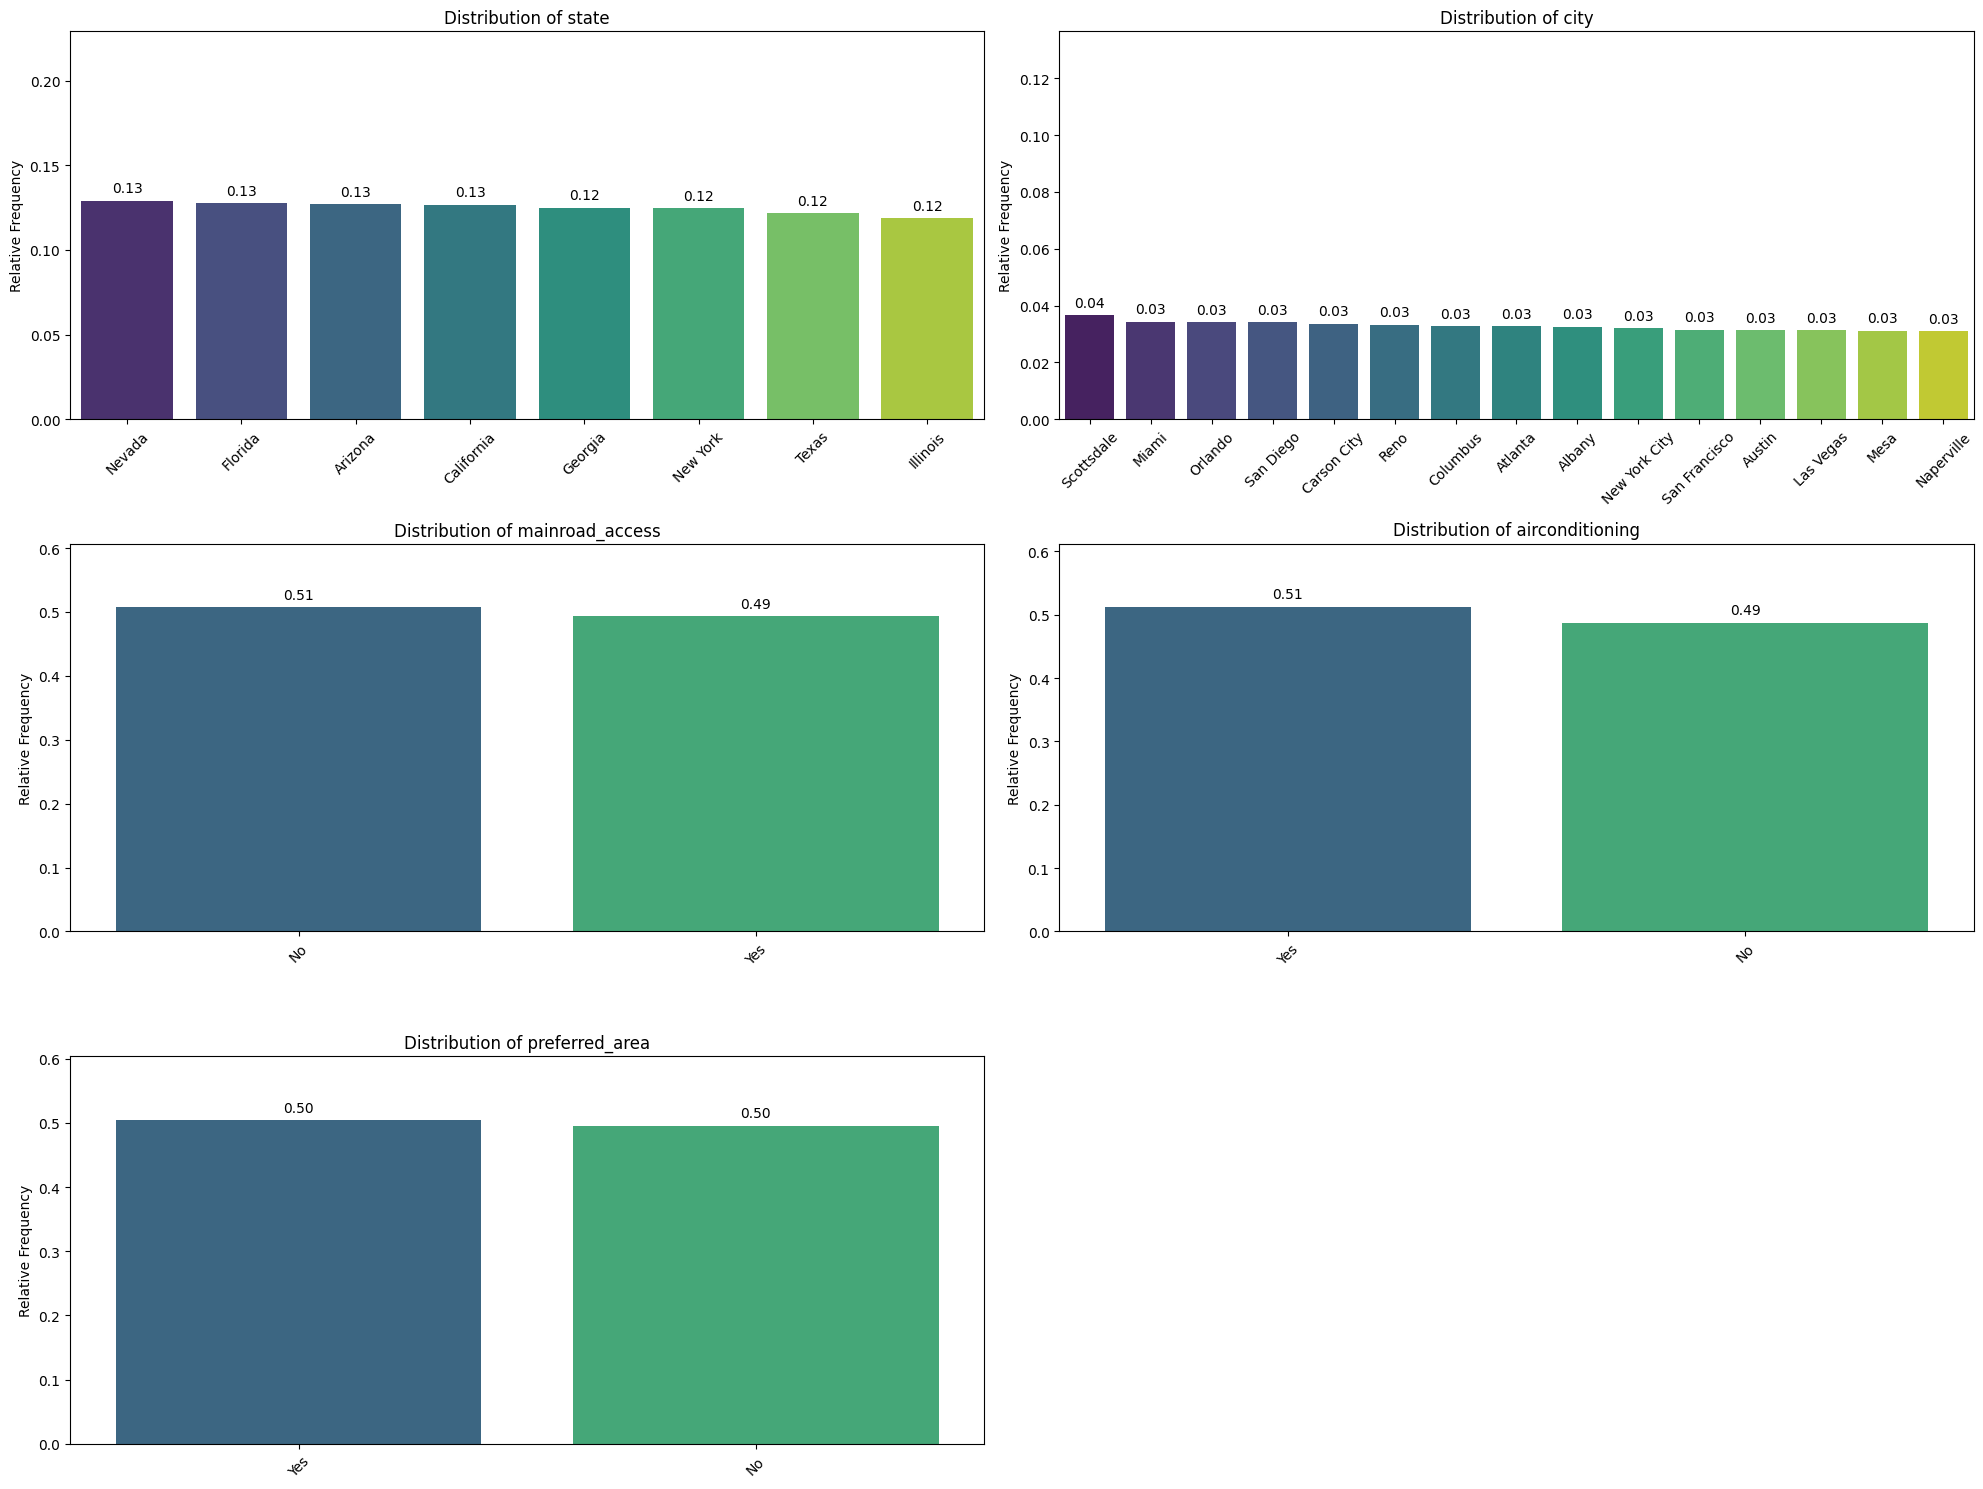

In [103]:
dpf.plot_categorical_distribution(train_set, cat_cols, relative = True, show_values = True, limit = 15)

*It seems to be quite balanced in terms of category features.*

(12, 2)


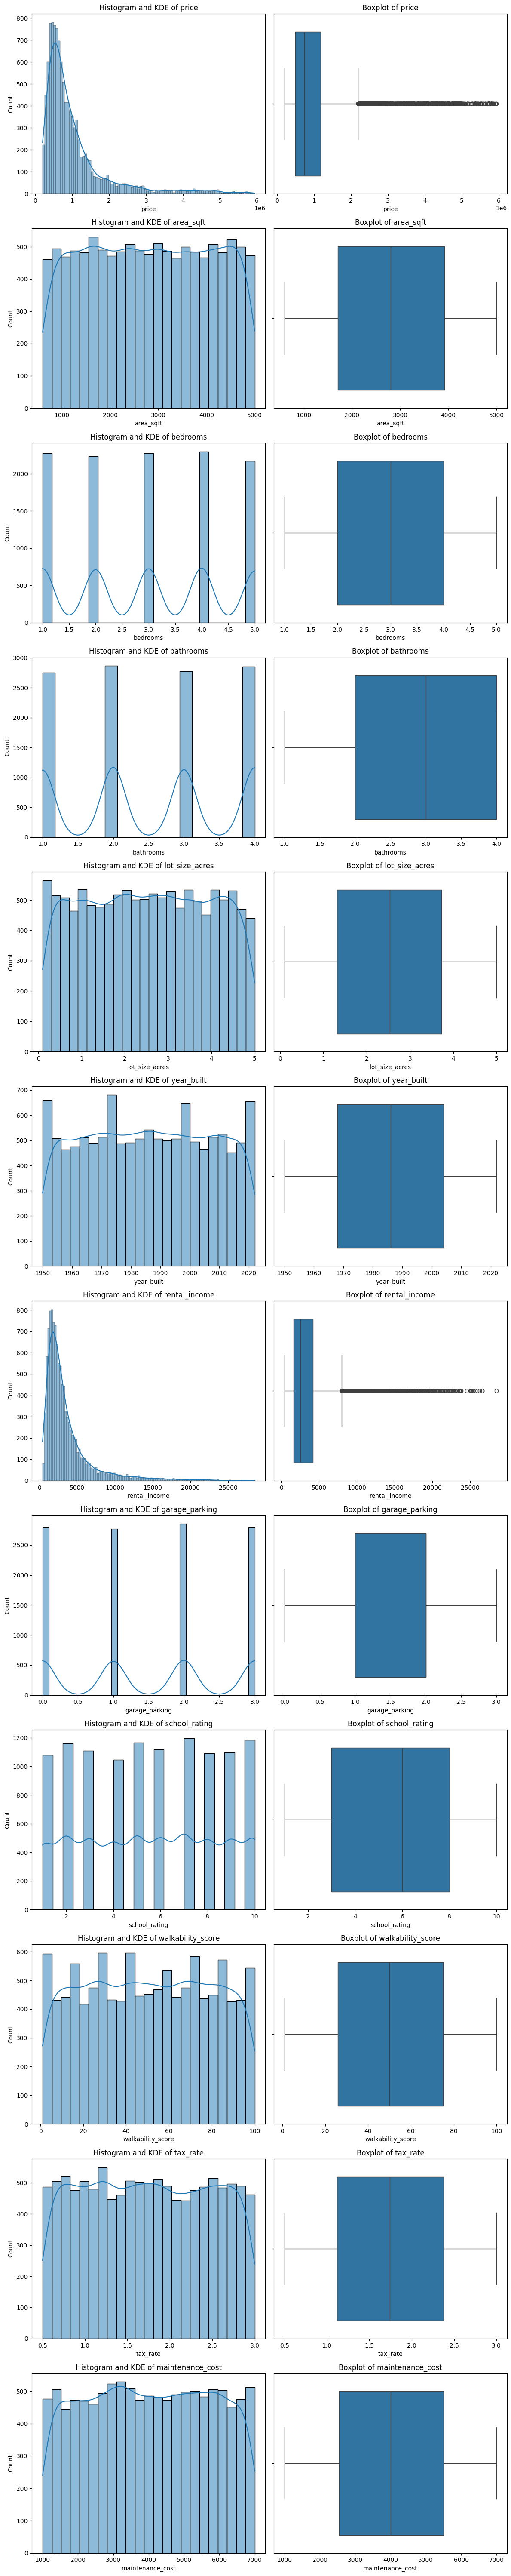

In [104]:
dpf.plot_combined_graphs(train_set, num_cols)

- **Property price**: *Shows a distribution skewed to the right, where most properties have low prices, but there are some significantly more expensive properties (outliers). Strong presence of outliers at the top of the price range.*   

- **Rental income**: *Shows a skewed distribution to the right, similar to that of prices, with most values concentrated in low income and some outliers. Presence of outliers at the high end, representing properties with unusually high rental income.*

- **Maintenance cost**: *Indicates an approximately uniform distribution, suggesting that maintenance costs are relatively evenly distributed among the available values. No significant outliers are present.* 

#### 4.2. Bivariate analysis

In [105]:
features_pairplot = ['price', 'area_sqft', 'lot_size_acres', 'year_built', 'rental_income', 'tax_rate', 'maintenance_cost']

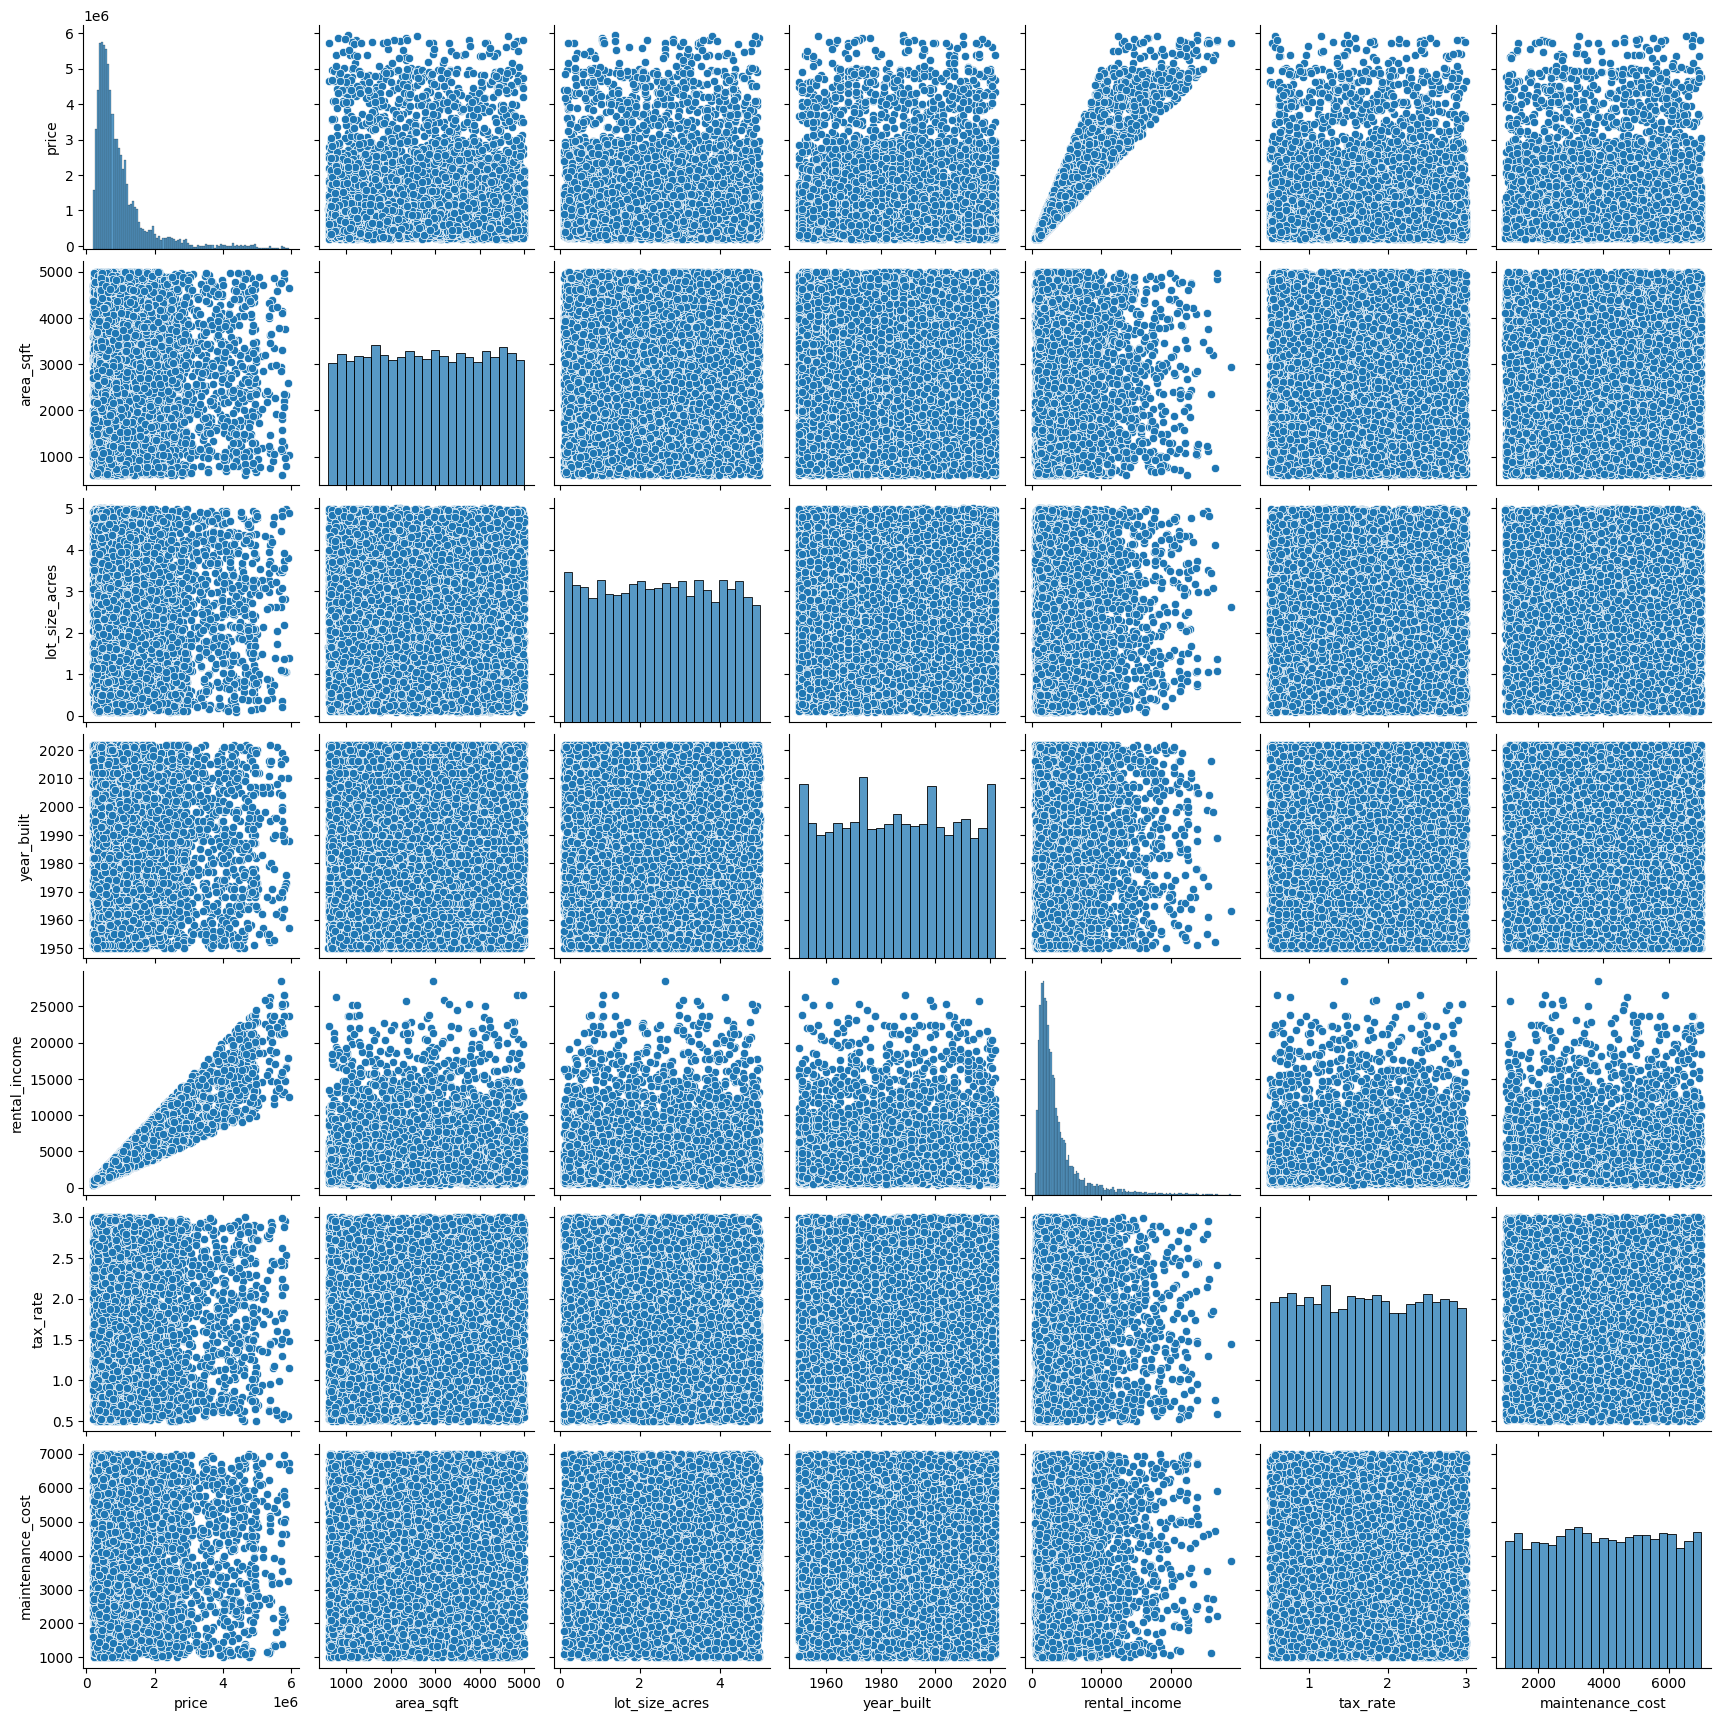

In [106]:
sns.pairplot(train_set[features_pairplot])

- **Price - Rental income**: *It is observed that properties with higher prices tend to generate higher rental income, although the degree of dispersion is considerable. Some higher priced properties do not generate as high rental income.*

*Let's do a bivariate analysis basing it in the column 'price'.*

In [107]:
corr = train_set.corr(numeric_only = True)
np.abs(corr['price']).sort_values(ascending = False)

price                1.000000
rental_income        0.937304
year_built           0.018721
garage_parking       0.012007
walkability_score    0.010907
area_sqft            0.007182
tax_rate             0.004985
bedrooms             0.004739
lot_size_acres       0.004582
bathrooms            0.004100
maintenance_cost     0.003684
school_rating        0.001792
Name: price, dtype: float64

<Axes: >

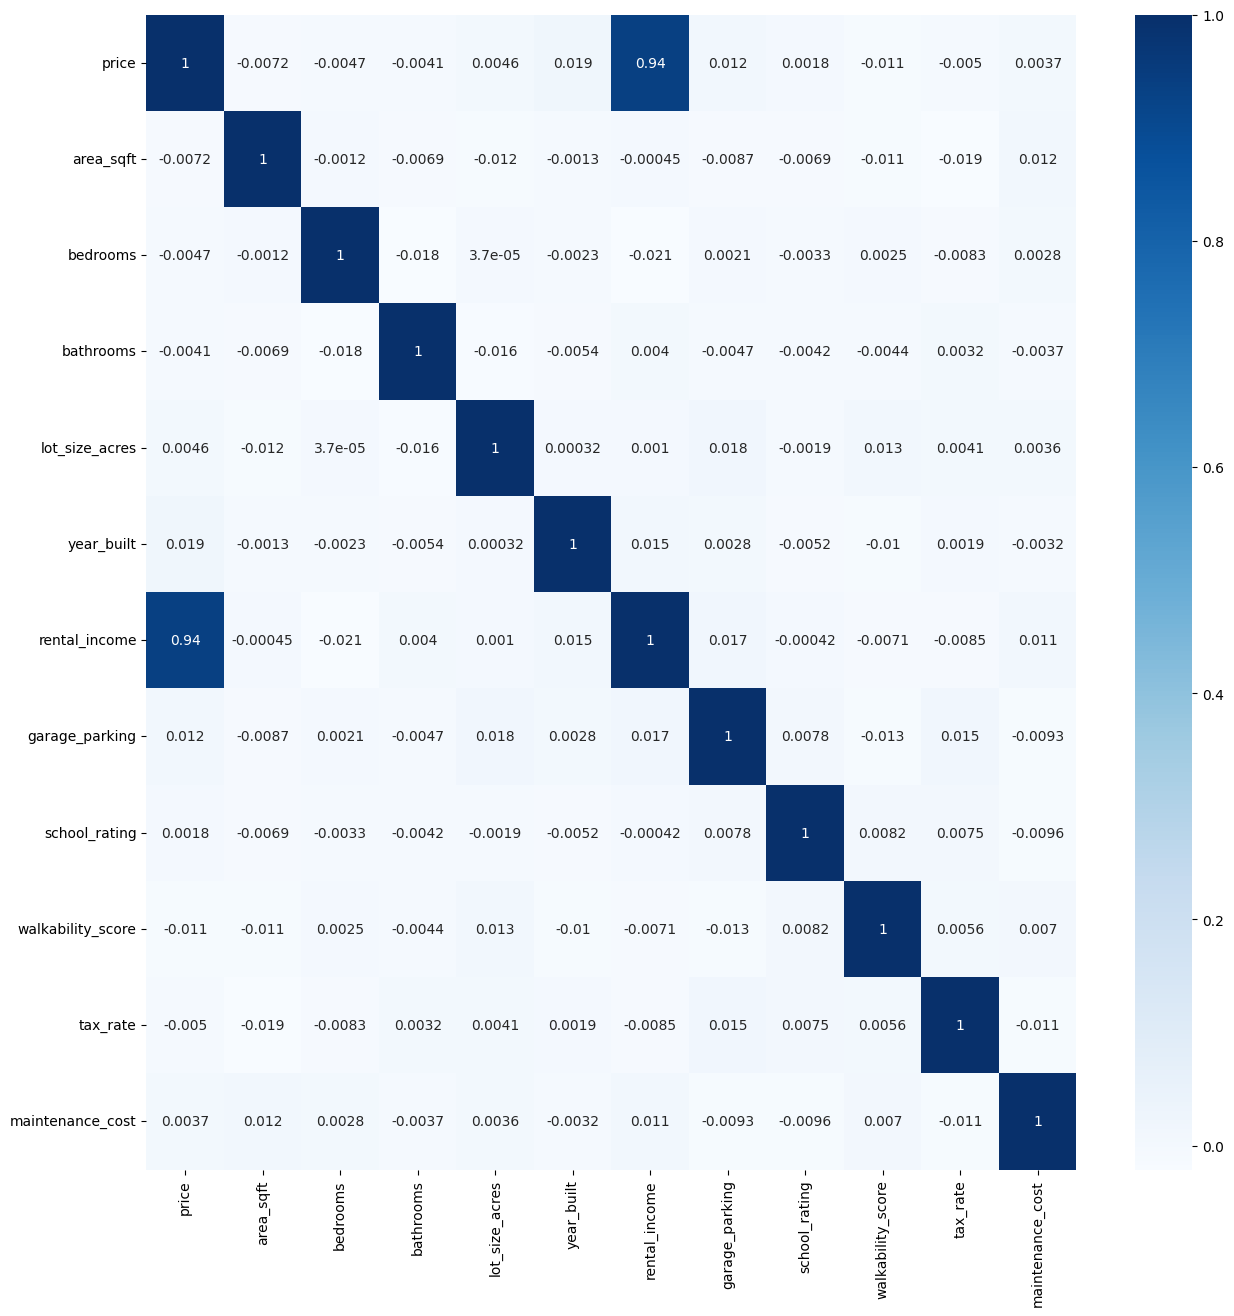

In [108]:
plt.figure(figsize = (15, 15))
sns.heatmap(corr, annot = True, cmap = "Blues")

### 4. Imputation of null values

In [109]:
# Verify if any missing values remain
train_set.isnull().sum()

state                  0
city                   0
price                854
area_sqft            848
bedrooms             827
bathrooms            844
lot_size_acres         0
year_built             0
rental_income        852
mainroad_access        0
airconditioning        0
garage_parking       853
school_rating        833
walkability_score    849
preferred_area         0
tax_rate             843
maintenance_cost     872
dtype: int64

In [110]:
# Imputation of missing values

# Step 1: Impute 'price' based on state, city, bedrooms, and area_sqft
median_price = train_set.groupby(["state", "city", "bedrooms"])["price"].transform("median")

train_set["price"] = train_set.apply(
    lambda row: row["price"] if not pd.isnull(row["price"]) else median_price[row.name],
    axis = 1)

# Step 2: Impute 'area_sqft' based on bedrooms and bathrooms
median_area = train_set.groupby(["bedrooms", "bathrooms"])["area_sqft"].transform("median")

train_set["area_sqft"] = train_set.apply(
    lambda row: row["area_sqft"] if not pd.isnull(row["area_sqft"]) else median_area[row.name],
    axis = 1)

# Step 3: Impute 'bedrooms' based on area_sqft and city
median_bedrooms = train_set.groupby(["city", "area_sqft"])["bedrooms"].transform("median")

train_set["bedrooms"] = train_set.apply(
    lambda row: row["bedrooms"] if not pd.isnull(row["bedrooms"]) else median_bedrooms[row.name],
    axis = 1)

# Step 4: Impute 'bathrooms' based on bedrooms and area_sqft
median_bathrooms = train_set.groupby(["bedrooms", "area_sqft"])["bathrooms"].transform("median")

train_set["bathrooms"] = train_set.apply(
    lambda row: row["bathrooms"] if not pd.isnull(row["bathrooms"]) else median_bathrooms[row.name],
    axis = 1)

# Step 5: Impute 'rental_income' based on price and location (state and city)
median_rental_income = train_set.groupby(["state", "city"]).apply(
    lambda group: (group["rental_income"] / group["price"]).median())

train_set["rental_income"] = train_set.apply(
    lambda row: row["rental_income"] if not pd.isnull(row["rental_income"]) else row["price"] * median_rental_income[row["state"], row["city"]],
    axis = 1)

# Step 6: Impute 'garage_parking' based on city and bedrooms
median_garage = train_set.groupby(["city", "bedrooms"])["garage_parking"].transform("median")

train_set["garage_parking"] = train_set.apply(
    lambda row: row["garage_parking"] if not pd.isnull(row["garage_parking"]) else median_garage[row.name],
    axis = 1)

# Step 7: Impute 'school_rating' based on state and city
median_school_rating = train_set.groupby(["state", "city"])["school_rating"].transform("median")

train_set["school_rating"] = train_set.apply(
    lambda row: row["school_rating"] if not pd.isnull(row["school_rating"]) else median_school_rating[row.name],
    axis = 1)

# Step 8: Impute 'walkability_score' based on state, city, and preferred_area
median_walkability = train_set.groupby(["state", "city", "preferred_area"])["walkability_score"].transform("median")

train_set["walkability_score"] = train_set.apply(
    lambda row: row["walkability_score"] if not pd.isnull(row["walkability_score"]) else median_walkability[row.name],
    axis = 1)

# Step 9: Impute 'tax_rate' based on state
median_tax_rate = train_set.groupby("state")["tax_rate"].transform("median")

train_set["tax_rate"] = train_set.apply(
    lambda row: row["tax_rate"] if not pd.isnull(row["tax_rate"]) else median_tax_rate[row.name],
    axis = 1)

# Step 10: Impute 'maintenance_cost' based on price and area_sqft
train_set["maintenance_cost"] = train_set.apply(
    lambda row: row["maintenance_cost"] if not pd.isnull(row["maintenance_cost"]) else (row["price"] * 0.005) + (row["area_sqft"] * 0.1),
    axis = 1)

# Verify if any missing values remain
train_set.isnull().sum()

state                  0
city                   0
price                 59
area_sqft            123
bedrooms             770
bathrooms            558
lot_size_acres         0
year_built             0
rental_income          8
mainroad_access        0
airconditioning        0
garage_parking        56
school_rating          0
walkability_score      0
preferred_area         0
tax_rate               0
maintenance_cost      11
dtype: int64

*As we still having null values, let's imputed them with the global median value.*

In [111]:
# Impute remaining missing values with global medians

columns_to_impute = ["price", "area_sqft", "bedrooms", "bathrooms", "rental_income", "garage_parking", "maintenance_cost"]
for col in columns_to_impute:
    train_set[col].fillna(train_set[col].median(), inplace = True)

# Verify that no missing values remain
train_set.isnull().sum()

state                0
city                 0
price                0
area_sqft            0
bedrooms             0
bathrooms            0
lot_size_acres       0
year_built           0
rental_income        0
mainroad_access      0
airconditioning      0
garage_parking       0
school_rating        0
walkability_score    0
preferred_area       0
tax_rate             0
maintenance_cost     0
dtype: int64

In [113]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12086 entries, 668 to 7270
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              12086 non-null  object 
 1   city               12086 non-null  object 
 2   price              12086 non-null  float64
 3   area_sqft          12086 non-null  float64
 4   bedrooms           12086 non-null  float64
 5   bathrooms          12086 non-null  float64
 6   lot_size_acres     12086 non-null  float64
 7   year_built         12086 non-null  int64  
 8   rental_income      12086 non-null  float64
 9   mainroad_access    12086 non-null  object 
 10  airconditioning    12086 non-null  object 
 11  garage_parking     12086 non-null  float64
 12  school_rating      12086 non-null  float64
 13  walkability_score  12086 non-null  float64
 14  preferred_area     12086 non-null  object 
 15  tax_rate           12086 non-null  float64
 16  maintenance_cost   12086 n

### 5. Create new columns

##### **Understanding ROI and Its Role in the Project**
**What is ROI?**

- **ROI** *stands for **Return on Investment**. It is a metric used to evaluate the profitability of an investment relative to its cost.*   

- *In real estate, ROI is used to determine how profitable a property is based on factors like purchase price, rental income, maintenance costs, and property taxes.*

*The formula for calculating ROI is:*

$$
ROI = \frac{(Rental\ Income \times 12) - Maintenance\ Cost - (Price \times \frac{Tax\ Rate}{100})}{Price} \times 100
$$
​
*Where:*

- *`Rental Income` is the monthly income generated from renting the property.*
- *`Maintenance Cost` is the annual cost of maintaining the property.*
- *`Price` is the purchase price of the property.*
- *`Tax Rate` is the annual property tax rate as a percentage.*

**Why create a ROI column?**

*The ROI column serves as a bridge to our target variable, which classifies properties into categories based on their profitability:*

- *Not profitable (`ROI < 0%`).*
- *Somewhat profitable (`0% ≤ ROI < 4%`).*
- *Highly profitable (`ROI ≥ 4%`).*

**Target Column**

*The target column will be named `profitability_category` and will classify properties into these three profitability categories.*

**Implementation**

*Let's calculate the `ROI` column using the formula and then categorize the properties into the `profitability_category`.*

In [115]:
# Calculate the ROI column
train_set["ROI"] = (
    (train_set["rental_income"] * 12 - train_set["maintenance_cost"] - (train_set["price"] * train_set["tax_rate"] / 100))
    / train_set["price"]) * 100

# Define profitability categories
def categorize_profitability(roi):
    if roi < 0:
        return "Not profitable"
    elif 0 <= roi < 4:
        return "Somewhat profitable"
    else:
        return "Highly profitable"

# Create the profitability_category column
train_set["profitability_category"] = train_set["ROI"].apply(categorize_profitability)

# Display sample data
train_set[["ROI", "profitability_category"]].head()


,ROI,profitability_category
668,-0.371121,Not profitable
13149,4.208066,Highly profitable
12508,4.283071,Highly profitable
4015,-0.012390,Not profitable
14185,2.451790,Somewhat profitable
